In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [52]:
rawData = pd.read_csv('source/datasets_20922_26985_Wholesale customers data.csv')
rawData

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [39]:
def visualization(dataFrameCol, colors, legendArgs, legendLoc, title, save):
    plt.figure(figsize = (6,6))
    plt.pie(dataFrameCol,
            colors = colors,
            autopct = '%.2f%%',
            textprops = {'size': 'x-large',
                        'color': '#1C5253',
                        'fontweight': 'bold'})
    plt.legend(legendArgs, loc = legendLoc)
    plt.title(title, 
            fontsize = 14,
            fontweight = 'bold')
    plt.savefig(save, dpi = 2000)
    plt.show()

In [40]:
## Channel

### First Channel (Hotels, Restaurants, Caffes)
channelOne = rawData[rawData['Channel'] == 1].count()

### Second Channel (Retail - [Normal Channel])
channelTwo = rawData[rawData['Channel'] == 2].count()

channels = pd.DataFrame(columns = ['Channel Name', 'Number of Channels'],
                        data = [['Hotels, Restaurants, Cafes', channelOne[0]],
                                 ['Retail', channelTwo[0]]])
channels

,Channel Name,Number of Channels
0,"Hotels, Restaurants, Cafes",298
1,Retail,142


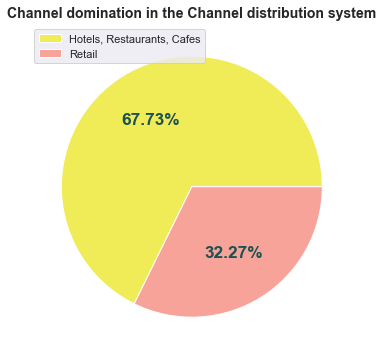

In [41]:
visualization(dataFrameCol = channels['Number of Channels'],
              colors = ['#F0EC57', '#F7A399'],
              legendArgs = channels['Channel Name'],
              legendLoc = 'upper left',
              title = 'Channel domination in the Channel distribution system',
              save =  'visualizations/CDS.png')

In [42]:
## Region
### First region - Lisnon
### Second region - Oporto
### Third region - Other

regionOne = rawData[rawData['Region'] == 1].count()
regionTwo = rawData[rawData['Region'] == 2].count()
regionThree = rawData[rawData['Region'] == 3].count()

regions = pd.DataFrame(columns = ['Region', 'Distribution channels'],
                       data = [['Lisnon (One)', regionOne[0]],
                               ['Oporto (Two)', regionTwo[0]],
                               ['Other (Three)', regionThree[0]]])
regions


,Region,Distribution channels
0,Lisnon (One),77
1,Oporto (Two),47
2,Other (Three),316


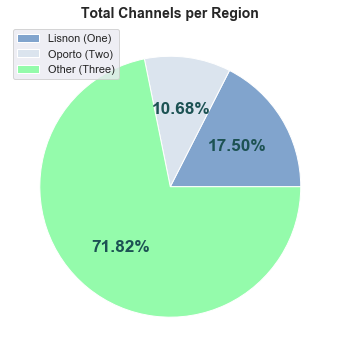

In [43]:
visualization(dataFrameCol = regions['Distribution channels'],
              colors = ['#81A4CD', '#DBE4EE', '#94FBAB'],
              legendArgs = regions['Region'],
              legendLoc = 'upper left',
              title = 'Total Channels per Region',
              save = 'visualizations/DCPR.png')

## Distribution channels inside of each region

In [57]:
rawDistCha = rawData.copy()
rawDistCha = rawDistCha.drop(['Fresh',
                              'Milk',
                              'Grocery',
                              'Frozen',
                              'Detergents_Paper',
                              'Delicassen'],
                              axis = 1)
rawDistCha

,Channel,Region
0,2,3
1,2,3
2,2,3
3,1,3
4,2,3
...,...,...
435,1,3
436,1,3
437,2,3
438,1,3


In [91]:
#### REGION ONE ####

### Channel One ###
R1C1 = rawDistCha[rawDistCha['Region'] == 1]
R1C1 = R1C1[R1C1['Channel'] == 1].count()
R1C1[0]

### Channel Two ###
R1C2 = rawDistCha[rawDistCha['Region'] == 1]
R1C2 = R1C2[R1C2['Channel'] == 2].count()
R1C2[0]

#### REGION TWO ####

### Channel One ###
R2C1 = rawDistCha[rawDistCha['Region'] == 2]
R2C1 = R2C1[R2C1['Channel'] == 1].count()
R2C1[0]

### Channel Two ###
R2C2 = rawDistCha[rawDistCha['Region'] == 2]
R2C2 = R2C2[R2C2['Channel'] == 2].count()
R2C2[0]

#### REGION THREE ####

### Channel One ###
R3C1 = rawDistCha[rawDistCha['Region'] == 3]
R3C1 = R3C1[R3C1['Channel'] == 1].count()
R3C1[0]

### Channel Two ###
R3C2 = rawDistCha[rawDistCha['Region'] == 3]
R3C2 = R3C2[R3C2['Channel'] == 2].count()
R3C2[0]

105

In [96]:
regionsChannels = pd.DataFrame(columns = ['Region', 'Channel One', 'Channel Two'],
                               data = [['Region Lisnon', R1C1[0], R1C2[0]],
                                       ['Region Oporto', R2C1[0], R2C2[0]],
                                       ['Other Regions', R3C1[0], R3C2[0]]])
regionsChannels

,Region,Channel One,Channel Two
0,Region Lisnon,59,18
1,Region Oporto,28,19
2,Other Regions,211,105


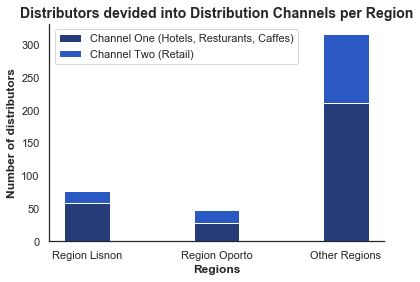

In [109]:
sns.set_style('white')
plt.bar(x = regionsChannels['Region'],
        height = [regionsChannels.at[0, 'Channel One'],
                  regionsChannels.at[1, 'Channel One'],
                  regionsChannels.at[2, 'Channel One']],
        color = '#253C78',
        width = 0.35)
plt.bar(x = regionsChannels['Region'],
        height = [regionsChannels.at[0, 'Channel Two'],
                  regionsChannels.at[1, 'Channel Two'],
                  regionsChannels.at[2, 'Channel Two']],
        color = '#2B59C3',
        bottom = [regionsChannels.at[0, 'Channel One'],
                  regionsChannels.at[1, 'Channel One'],
                  regionsChannels.at[2, 'Channel One']],
        width = 0.35)

plt.xlabel('Regions',
           fontsize = 12,
           fontweight = 'bold')

plt.ylabel('Number of distributors',
           fontsize = 12,
           fontweight = 'bold')

plt.title('Distributors devided into Distribution Channels per Region',
          fontsize = 14,
          fontweight = 'bold')
plt.legend(['Channel One (Hotels, Resturants, Caffes)',
            'Channel Two (Retail)'],
           loc = 'upper left')
sns.despine(top = True,
            right = True)
plt.show()